In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df1 = pd.read_csv('../dataset/index_1.csv')

In [47]:
df1.head

<bound method NDFrame.head of             date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
3631  2025-03-23  2025-03-23 10:34:54.894      card  ANON-0000-0000-1158   
3632  2025-03-23  2025-03-23 14:43:37.362      card  ANON-0000-0000-1315   
3633  2025-03-23  2025-03-23 14:44:16.864      card  ANON-0000-0000-1315   
3634  2025-03-23  2025-03-23 15:47:28.723      card  ANON-0000-0000-1316   
3635  2025-03-23  2025-03-23 18:11:38.635      card  ANON-0000-0000-1275   

      money    coffee_name  
0     38.70          Latte  

In [48]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,3636,381,2024-10-11,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
datetime,3636,3636,2025-03-23 18:11:38.635,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cash_type,3636,2,card,3547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card,3547,1316,ANON-0000-0000-0012,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
money,3636.0,NaN,NaN,NaN,31.746859,4.919926,18.12,27.92,32.82,35.76,40.0
coffee_name,3636,8,Americano with Milk,824,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df1['date'] = pd.to_datetime(df1['date'], errors ='coerce')

In [50]:
df1['money'] = pd.to_numeric(df1['money'], errors='coerce')

In [51]:
df1['coffee_name'].head

<bound method NDFrame.head of 0               Latte
1       Hot Chocolate
2       Hot Chocolate
3           Americano
4               Latte
            ...      
3631       Cappuccino
3632            Cocoa
3633            Cocoa
3634        Americano
3635            Latte
Name: coffee_name, Length: 3636, dtype: object>

In [52]:
coffee = (
    df1.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
)
coffee

coffee_name
Latte                  27866.30
Americano with Milk    25269.12
Cappuccino             18034.14
Americano              15062.26
Hot Chocolate          10172.46
Cocoa                   8678.16
Cortado                 7534.86
Espresso                2814.28
Name: money, dtype: float64

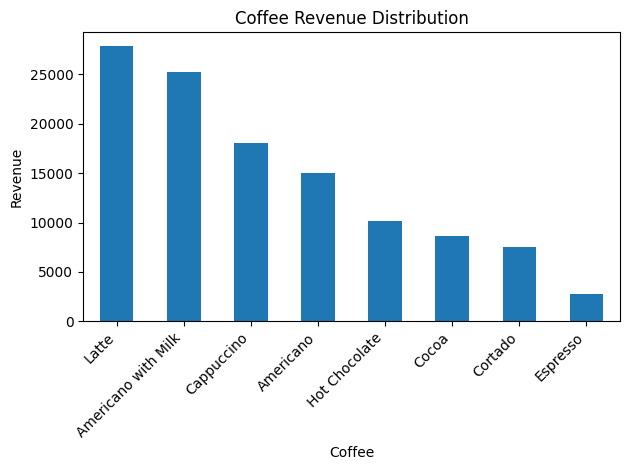

In [53]:
plt.figure()
coffee.plot(kind='bar')
plt.title('Coffee Revenue Distribution')
plt.xlabel('Coffee')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../images/Coffee Revenue Distribution')
plt.show()

In [54]:
payment_type = (
    df1.groupby('cash_type')['money'].sum().sort_values(ascending=False)
)

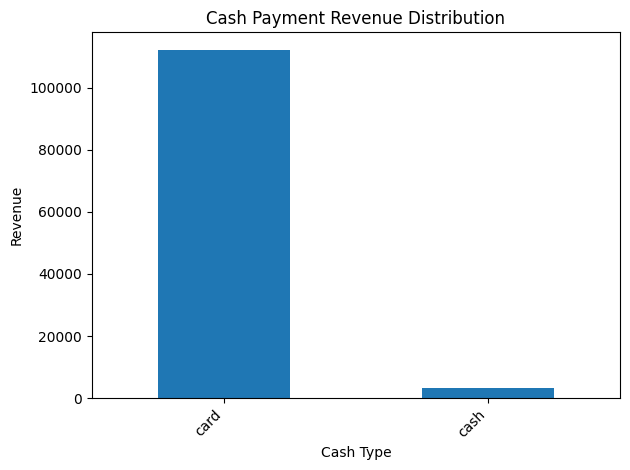

In [55]:
plt.figure()
plt.title('Cash Payment Revenue Distribution')
payment_type.plot(kind='bar')
plt.xlabel('Cash Type')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../cash payment dis')
plt.show()

In [56]:
coffee_avg = (
    df1.groupby('coffee_name')['money'].mean().sort_values(ascending=False)
)
coffee_avg

coffee_name
Hot Chocolate          36.072553
Cappuccino             35.996287
Cocoa                  35.712593
Latte                  35.634655
Americano with Milk    30.666408
Americano              26.059273
Cortado                25.804315
Espresso               21.002090
Name: money, dtype: float64

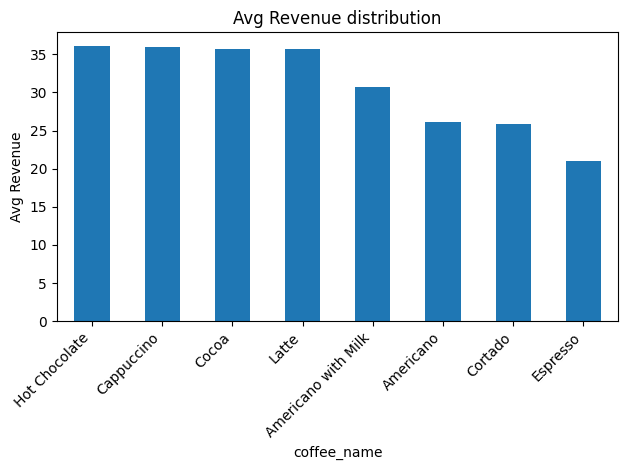

In [57]:
plt.figure()
plt.title('Avg Revenue distribution')
plt.xlabel('Coffee')
plt.ylabel('Avg Revenue')
coffee_avg.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../images/avg coffee rev dis')
plt.show()

In [58]:
avgrev_cash_payment = (
    df1.groupby('cash_type')['money'].mean().sort_values(ascending=False)
)
avgrev_cash_payment

cash_type
cash    35.797753
card    31.645216
Name: money, dtype: float64

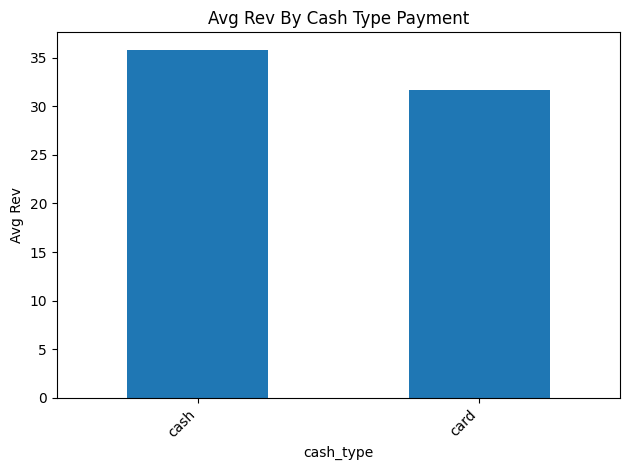

In [59]:
plt.figure()
plt.title('Avg Rev By Cash Type Payment')
plt.xlabel('Cash Type')
plt.ylabel('Avg Rev')
avgrev_cash_payment.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../images/avgrev_cashpay')
plt.show()

In [61]:
df1['month'] = df1['date'].dt.strftime('%B')
df1['month']

0       March
1       March
2       March
3       March
4       March
        ...  
3631    March
3632    March
3633    March
3634    March
3635    March
Name: month, Length: 3636, dtype: object

In [62]:
rev_month = (
    df1.groupby('month')['money'].sum().sort_values(ascending=False)
)
rev_month

month
March        17036.64
October      13891.16
February     13215.48
September     9988.64
May           9063.42
November      8590.54
December      8237.74
June          7758.76
August        7613.84
July          6915.94
April         6720.56
January       6398.86
Name: money, dtype: float64

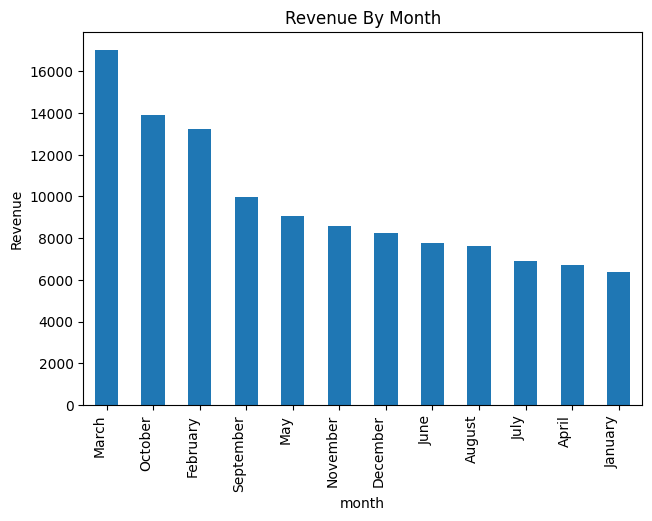

In [63]:
plt.figure()
plt.title('Revenue By Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
rev_month.plot(kind='bar')
plt.savefig('../images/rev by month')
plt.show()